# Chapter 3

> Moreover, it serves as a good jumping-oﬀ point for
newer approaches: as we will see in later chapters, many fancy statistical
learning approaches can be seen as generalizations or extensions of linear
regression.

> Here are a few important questions that we might
seek to address:
>
> 1. Is there a relationship between advertising budget and sales?
> 2. How strong is the relationship between advertising budget and sales?
> 3. Which media are associated with sales?
> 4. How large is the association between each medium and sales?
> 5. How accurately can we predict future sales?
> 6. Is the relationship linear?
> 7. Is there synergy among the advertising media?
>
> It turns out that linear regression can be used to answer each of these
questions.

Assumir que
$$
    Y \approx \beta_0 + \beta_1 X
$$
Onde $\approx$ significa **aproximadamente modelado como** mais que **o valor é aproximadamente igual a**.

$$
    \hat y_i = \hat \beta_0 + \hat \beta_1x_i \implies
    e_i = y_i - \hat y_i
$$

Onde $e_i$ é o i-ésimo resíduo entre os valores reais e o modelo usando os coeficientes estimados.

$$
    RSS = \sum^n_{i=1} e^2_i = \sum^n_{i=1}(y_i - \hat \beta_0 - \hat \beta_1x_i)^2
$$

Onde RSS é a soma residual dos quadrados, uma técnica simples diretamente relacionada à aproximação do modelo aos dados. É possível provar que os valores para $\left\{\hat \beta_0, \hat \beta_1\right\}$ que otimizam RSS são

$$
    \hat \beta_1 = \frac {\sum^n_{i=1}(x_i-\bar x)(y_i - \bar y)}{\sum^n_i=1(x_i-\bar x)^2} \\
    \hat \beta_0 = \bar y - \hat \beta_1 \bar x
$$

Essa técnica é conhecida como otimização por mínimos quadrados, onde as médias usadas nesse contexto usam a média artimética dos valores do dataset de treino.

**Dúvida:** O livro afirma que a função de RSS é sempre côncava e os valores para $\Beta = \left\{\hat \beta_0, \hat \beta_1\right\}$ acima sempre se encontram no mínimo global da função. Existe alguma afirmação que pode ser feita sobre a concavidade do RSS?

Mesmo analisando $\Beta$ obtido com um dataset que vem de uma função exata os valores nunca serão iguais aos coeficientes da função original.

Se queremos estimar o valor médio ($\mu$) da população usando uma amostra ($\hat \mu$) e queremos saber quão diferentes os dois valores são podemos avaliar o Erro Padrão de $\hat \mu = SE(\hat \mu)$:
$$
    Var(\hat \mu) = SE(\mu)^2 = \frac{\sigma^2}n
$$
Essa equação também indica que quanto maior o número de exemplos (n) menor o erro padrão e é possível inferir que a proximidade entre $\beta_0, \beta_1$ é:
$$
SE(\hat \beta_0)^2 = \sigma^2\left[\frac 1 n + \frac{\bar x^2}{\sum^n_{i=1}(x_i-\bar x)^2}\right] \\ ~ \\
SE(\hat \beta_1)^2 = \frac{\sigma^2}{\sum^n_{i=1}(x_i-\bar x)^2}
$$
Desde que os erros em comum para cada exemplo tenham $\sigma^2$ iguais e não possuam correlação, o que nem sempre é verdadeiro.

Essas medidas de erro podem ser usadas para definir intervalos de confiança, o que significa que há X% de probabilidade que que esse intervalo contém o valor real da predição, o que em muitos casos é o suficiente (o capítulo 3.1. tem uma explicação com mais detalhes do que isso significa).

Essa informação também pode ser usada para criar testes de hipótese. O teste de hipótese mais comum envolve a hipótese nula, ou seja:

> $H_0$: Não há relação entre X e Y.

Contra a hipótese alternativa:

> $H_a$: Existe alguma relação entre X e Y.

Isso corresponde matematicamente a testar que:

$$
H_0: \beta_1 = 0 \\
H_a: \beta_1 \neq 0
$$

Já que caso a hipótese nula seja verdadeira $Y = \beta_1 + \epsilon$ logo não depende de X.

Para garantir que a hipótese nula é verdadeira é preciso determinar que $\hat \beta_1 \neq 0$ é suficientemente distante de 0, para que o valor obtido nao seja todo proveniente do erro, o que depende do erro padrão ($SE(\hat\beta_1)$). Se esse erro for significativamente pequeno há forte evidência que há uma relação entre os dois valores, e se for grande, $\beta_1$ precisa ser grande em valor absoluto para rejeitar a hipótese nula. Esse teste pode ser feito usando uma estatística-t:
$$
    t = \frac {\hat \Beta_1 - 0} {SE(\hat \beta_1)}
$$
Esse valor mede o número de desvios padrão que $\hat\beta_1$ está de 0. Se nenhuma relação existir entre X e Y a distribuição normal de t terá n-2 graus de liberdade. Para valores maioresq ue 30 é muito próxima da distribuição normal padrão e é simples descobrir a probabilidade de observar um número igual a |t| ou maior assumindo que $\Beta_1 = 0$, que é chamado de valor p.

Valores p pequenos podem ser uma inferência que há uma associação entre o preditor e a resposta já que significa que a probabilidade daquela distribuição ser uma coincidência é muito pequena. Nesses casos a hipótese nula pode ser rejeitada. Uma regra geral é abaixo de 5% mas esse valor depende demais do contexto.

**obs:** já vi muitas pessoas classificarem em dados normais outliers como tendo 2 desvios padrão ou mais de distância da média e acredito que essa regra geral veio do teste t.

Todos os testes acima são feitos para ajudar a decidir se há ou não relação entre os dados mas não dizem qual modelo se adequa melhor aos dados. Geralmente para determinar isso o RSE (residual standard error) e R^2 são usados mas existem muitos outros.

**RSE:** É uma estimativa do desvio padrão de $\epsilon$, o erro irredutível, ou seja, representa o valor médio da diferença entre a resposta real e a verdadeira linha de regressão.
$$
RSE = \sqrt{\frac 1 {n-2}RSS} = \sqrt{\frac 1 {n-2}\sum^n_{i=1}(y_i-\hat y_i)^2} \\
RSS = \sum^n_{i=1}(y_i-\hat y_i)^2
$$
RSE pode ser considerada uma medida absoluta da falta de ajuste do modelo (minimizável) e é medido nas unidades de Y.

**$R^2$:** É uma proporção da variância explicada pelo modelo independentemente da escala de Y.
$$
R^2 = \frac{TSS - RSS}{TSS} = 1-\frac {RSS} {TSS} \\ ~ \\
TSS = \sum(y_i-\bar y)^2
$$
TSS pode ser interpretado como a variância total na resposta antes da regressão ser treinada.

RSS pode ser interpretado como a variabilidade que não foi explicada após treinar a regressão, logo TSS - RSS é a quantidade de veriabilidade na resposta que foi explicada e $R^2$ a proporção entre os dois valores (maximizável). 

Uma vantagem do $R^2$ é que esse valor é inerentemente mais interpretável mas em muitos contextos trazer explicabilidade para um modelo não é viável. Em geral $R^2$ é uma métrica mais útil quando as relações dos dados são interpretáveis / possuem insights mais claros. Frequentemente bons modelos de predição não possuem bom $R^2$ mesmo que possuam bom desempenho na realidade.

Essa métrica pode ser tratada como uma medida da linearidade da relação entre X e Y, bem como a medida de correlação descrita antes.

**OBS:** Qual a diferença dessa correlação para Pearson / Spearman / etc.?

É possível demonstrar que em contextos de regressão linear simplesos dois valores são iguais, mas em contextos de regressão linear múltipla essa relação não é necessariamente verdadeira e R^2 descreve a correlação melhor que a função $Cor(X, Y)$.

Uma regressão linear múltipla é descrita por:
$$
Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + \cdots + \beta_pX_p + \epsilon
$$
Os coeficientes podem ser otimizados minimizando a soma dos quadrados residuais:
$$
RSS = \sum^n_{i=1}(y_i-\hat y_i)^2
$$
Uma dificuldade em regressões múltiplas é interpretar a diferença entre correlação e causalidade.

> When we perform multiple linear regression, we usually are interested in answering a few important questions.
> 1. Is at least one of the predictors X1, X2,...,Xp useful in predicting the response?
> 2. Do all the predictors help to explain Y , or is only a subset of the predictors useful?
> 3. How well does the model fit the data?
> 4. Given a set of predictor values, what response value should we predict, and how accurate is our prediction?

1. A primeira pergunta pode ser respondida fazendo um teste de hipótese através da estatística F:
$$
    F = \frac{\frac{TSS - RSS} p}{\frac {RSS}{n-p-1}} \\
    TSS = \sum{y_i - \bar y}^2 \\
    RSS = \sum{y_i - \hat y_i}^2
$$
É possível demonstrar que caso a hipótese nula seja falsa, o numerador é $\sigma^2$ e no caso de ser verdadeira, o denominador será $\sigma^2$
Se a hipótese nula for verdadeira a estatística F terá valor próximo de 1 e caso contrário será distante de 1.

2. Existem diversas formas de determinar as melhores variáveis independentes, entre elas:
* *Forward Selection*: começa com um modelo sem preditores. Treina regressões lineares independentes e soma as regressões até achar a combinação com menor RSS e repete o processo até que uma regra seja atingida.
* *Backward Selection": começa considerando todas as variáveis, remove a variável com maior valor p e treina novamente até que uma regra seja atingida.
* *Mixed Selection*: Funciona igual ao *forward selection* mas só adiciona as variáveis se o valor p está abaixo de um certo valor. Funciona melhor que o primeiro caso quando existem mais variáveis que entradas (exemplo: imagens).

3. Algumas métricas de ajuste para regressões lineares múltiplas são enviesadas. Em especial o $R^2$ sem ajustes tende a priorizar modelos com muitas variáveis para aumentar a variância explicada, causando *overfitting*.

Para usar o RSE corretamente é necessário usar sua forma generalizada para que mais variáveis sejam consideradas apenas quando o RSS diminui significativamente:
$$
    RSE = \sqrt{\frac 1 {n-p-1} \cdot RSS}
$$

4. A forma mais confiável de aumentar a garantia nos resultados é considerar um intervalo de confiança para as predições.

Outras considerações:
* Variáveis qualitativas:
    * Se possuem apenas dois estados podem ser transformadas em variáveis *dummy* para serem tratadas como quantitativas.
    * Se possui mais de dois estados é preciso criar uma variável nova para cada estado possível.
    * Em ambos os casos nesse contexto essa separação para descartar variáveis dummy com valor p alto.
* Funções não lineares como Funções aditivas ($y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_1 x_2$) e funções polinomiais:
    * Esses termos podem ser tratados como atributos novos ($x_3 = x_1 x_2, x_4 = x1^2, \cdots$) e treinados como uma regressão linear, mas é importante verificar as correlações para evitar *overfitting*.

Problemas:
* Baixa linearidade dos dados:
    * Em certos casos é possível determinar a não linearidade dos dados usando residual plots (um gráfico de dispersão de um preditor (ou o valor predito) pelo erro do modelo para cada item).
* Modelos lineares precisam assumir que os erros não possuem correlação (como acontece frequentemente em séries temporais), logo quando isso não é verdade é necessário usar outro tipo de abordagem.
* Modelos lineares precisam assumir que a variância do erro sempre será igual a $\sigma^2$. A falta desse comportamento pode ser identificada por um afunilamento no gráfico residual. Existem abordagens que funcionam melhor nesse tipo de situação, como os mínimos quadrados ponderados.
* Outliers podem ser um problema dependendo do contexto, mas também podem ser difíceis de separar dos dados corretos. Uma forma de encontrá-los é computar e visualizar os resíduos studentizados.
* Leverage: é o impacto que cada entrada terá durante o treinamento. Isso é perigoso se os dados são outliers.
$$
    h_i = \frac 1 n + \frac{(x_i - \bar x)^2}{\sum^n_{i'=1}(x_{i'}-\bar x)^2}
$$
* Colinearidade: variáveis que tem forte correlação entre si mas não necessariamente com a variável preditora podem afetam fortemente a performance do modelo.
    * Em casos simples é possível determinar colinearidade e escolher as variáveis corretas usando uma matriz de correlação.
        * Em casos de multicolinearidade (quando uma variável independente tem forte correlação com mais de uma variável independente mas não com a variável que queremos predizer) isso não é possível mas é possível determinar o fator de inflação da variância (VIF), que é a proporção da variância dos coeficientes preditos no final pela variância desse termo ajustado sozinho (o que isso significa?).
        $$
            VIF(\hat \beta_j) = \frac 1 {1 - R^2_{X_j | X_{-j}}} \\
            R^2_{X_j | X_{-j}}: R^2 \text{ em uma regressão usando todas as variáveis}
        $$
        * Regra geral: esse valor varia de 1 (não há colinearidade) a 5-10 (colinearidade problemática)
    


Regressão usando KNN:

* **Vantagens**: não afirma nada sobre a linearidade da função e se ajusta às complexidades dos dados muito bem quando existem grandes volumes de dados.
* **Desvantagens**: Casos seja treinada com poucos exemplos pode sofrer variância muito alta.

$$
    \hat f(x_0) = \frac 1 K \sum_{x_i \in N_0} y_i \\
    N_0: \text{conjunto com os K exemplos de treino mais proximos de }x_0
$$

## Laboratório

**TODO:**
* Fazer TTS do dataset
* Verificar as métricas (RSE, R2, residual, etc.)
* Repetir para regressão múltipla

In [8]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("../datasets/Boston.csv", index_col=0)
df.sample(10)


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
479,10.23300,0.0,18.10,0,0.614,6.185,96.7,2.1705,24,666,20.2,18.03,14.6
304,0.10000,34.0,6.09,0,0.433,6.982,17.7,5.4917,7,329,16.1,4.86,33.1
468,4.42228,0.0,18.10,0,0.584,6.003,94.5,2.5403,24,666,20.2,21.32,19.1
348,0.01870,85.0,4.15,0,0.429,6.516,27.7,8.5353,4,351,17.9,6.36,23.1
165,2.24236,0.0,19.58,0,0.605,5.854,91.8,2.4220,5,403,14.7,11.64,22.7
286,0.01096,55.0,2.25,0,0.389,6.453,31.9,7.3073,1,300,15.3,8.23,22.0
297,0.05372,0.0,13.92,0,0.437,6.549,51.0,5.9604,4,289,16.0,7.39,27.1
459,7.75223,0.0,18.10,0,0.713,6.301,83.7,2.7831,24,666,20.2,16.23,14.9
279,0.07978,40.0,6.41,0,0.447,6.482,32.1,4.1403,4,254,17.6,7.19,29.1
251,0.14030,22.0,5.86,0,0.431,6.487,13.0,7.3967,7,330,19.1,5.90,24.4


In [14]:
X_train = df["lstat"]
y_train = df["medv"]
linearRegression = LinearRegression()
linearRegression.fit(X_train.values.reshape(-1, 1), y_train)


LinearRegression()

<AxesSubplot:xlabel='lstat', ylabel='medv'>

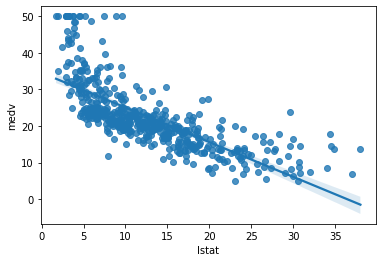

In [12]:
sns.regplot(data=df[["lstat", "medv"]], x="lstat", y="medv")


## Exercícios

### Conceituais

**1. Describe the null hypotheses to which the p-values given in Table 3.4
correspond. Explain what conclusions you can draw based on these
p-values. Your explanation should be phrased in terms of sales, TV,
radio, and newspaper, rather than in terms of the coefficients of the
linear model.**

As hipóteses nulas nesse caso consideram que o coeficiente numérico para `Intercept, TV, radio, newspaper` é nulo, ou seja, existem fortes evidências que qualquer correlação linear entre o valor predito e as variáveis seja coincidência. No caso o valor p de `Intercept, TV, radio` é muito pequeno e a hipótese nula pode ser desconsiderada, porém é necessário verificar a possibilidade de colinearidade entre esses valores. `Newspaper` possui um valor p muito alto e a hipótese nula não pode ser descartada.

**2. Carefully explain the differences between the KNN classifier and KNN
regression methods.**

Um classificador KNN prediz que a classe para os dados escolhidos será a classe mais frequente entre os K exemplos de treino mais próximos desses dados.

Um regressor KNN prediz que o valor estimado para os dados escolhidos será a média dos K exemplos de treino mais próximos desses dados.

**3. Suppose we have a data set with five predictors, X1 = GPA, X2 = IQ, X3 = Level (1 for College and 0 for High School), X4 = Interaction between GPA and IQ, and X5 = Interaction between GPA and Level. The response is starting salary after graduation (in thousands of dollars). Suppose we use least squares to fit the model, and get βˆ0 = 50, βˆ1 = 20, βˆ2 = 0.07, βˆ3 = 35, βˆ4 = 0.01, βˆ5 = −10.**

**(a) Which answer is correct, and why?**

**i. For a fixed value of IQ and GPA, high school graduates earn more, on average, than college graduates.**

Falso.

**ii. For a fixed value of IQ and GPA, college graduates earn more, on average, than high school graduates.**

Verdadeiro, já que $\beta_3$ possui um coeficiente positivo alto.

**iii. For a fixed value of IQ and GPA, high school graduates earn more, on average, than college graduates provided that the GPA is high enough.**

Verdadeiro, já que $\beta_1$ possui um coeficiente positivo alto. Porém, GPA precisa ser muito alto já que $\beta_3$ é significativamente maior e GPA é um valor limitado.

**iv. For a fixed value of IQ and GPA, college graduates earn more, on average, than high school graduates provided that the GPA is high enough.**

Falso.

**(b) Predict the salary of a college graduate with IQ of 110 and a GPA of 4.0.**

In [17]:
def salary(x1, x2, x3):
    return 50 + 20 * x1 + 0.07 * x2 + 35 * x3 + 0.01 * x1 * x2 - 10 * x1 * x3


salary(4, 110, 1)


137.1

**(c) True or false: Since the coefficient for the GPA/IQ interaction term is very small, there is very little evidence of an interaction effect. Justify your answer.**

O valor do coeficiente depende dos dados de treino e não é uma verdade absoluta sobre a relação dos dados. Para determinar o efeito de interação são mais garantidos testes de hipótese e outras métricas sobre os dados antes do treino.

**4. I collect a set of data (n = 100 observations) containing a single predictor and a quantitative response. I then fit a linear regression model to the data, as well as a separate cubic regression, i.e. Y = β0 + β1X + β2X2 + β3X3 + ϵ.**
    
**(a) Suppose that the true relationship between X and Y is linear, i.e. Y = β0 + β1X + ϵ. Consider the training residual sum of squares (RSS) for the linear regression, and also the training RSS for the cubic regression. Would we expect one to be lower than the other, would we expect them to be the same, or is there not enough information to tell? Justify your answer.**

A função cúbica é mais flexível que a linear e em treino tem mais potencial de minimizar o RSS que a função linear.

**(b) Answer (a) using test rather than training RSS.**

Falta informação sobre os dados. Nem toda relação entre duas variáveis é linear. Para maior certeza sobre a forma dos dados seria necessário a verificação entre a colinearidade e a correlação entre a função de X e Y.

**(c) Suppose that the true relationship between X and Y is not linear, but we don’t know how far it is from linear. Consider the training RSS for the linear regression, and also the training RSS for the cubic regression. Would we expect one to be lower than the other, would we expect them to be the same, or is there not enough information to tell? Justify your answer.**

É esperado que o RSS da função cúbica seja menor que o da função linear já que essa função é mais flexível, podendo se adequar melhor aos exemplos e obter um valor melhor para o RSS que a função linear.

**(d) Answer (c) using test rather than training RSS.**

É esperado que a função cúbica tenha um desempenho melhor nos testes por se adequar melhor à não linearidade da base de dados. Porém não linearidade é uma descrição muito ampla e não significa que os dados podem ser descritos por uma função cúbica.

5. Consider the fitted values that result from performing linear regression without an intercept. In this setting, the ith fitted value takes the form
$$
    \hat y_i = x_i \hat \beta
$$

where

$$
    \hat \beta = \frac {\sum^n_{i=1}x_iy_i}{\sum^n_{i'=1}x^2_i}
$$

Show that we can write
    
$$
    \hat y_i = \sum^n_{i'=1}a_{i'}y_{i'}
$$

What is $a_{i'}$?

*Note: We interpret this result by saying that the fitted values from linear regression are linear combinations of the response values.*

6. Using (3.4), argue that in the case of simple linear regression, the least squares line always passes through the point (¯x, y¯).

7. It is claimed in the text that in the case of simple linear regression of Y onto X, the R2 statistic (3.17) is equal to the square of the correlation between X and Y (3.18). Prove that this is the case. For simplicity, you may assume that ¯x = ¯y = 0.

### Aplicados

8. This question involves the use of simple linear regression on the `Auto` data set.

(a) Use the `lm()` function to perform a simple linear regression with
mpg as the response and horsepower as the predictor. Use the
`summary()` function to print the results. Comment on the output.

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
%matplotlib inline

In [51]:
auto = pd.read_csv("../datasets/Auto.csv")
auto = auto[auto["mpg"] != "?"]
auto = auto[auto["horsepower"] != "?"]

X_train, X_test, y_train, y_test = train_test_split(
    auto["horsepower"].values, auto["mpg"].values, test_size=0.2
)


In [38]:
linearRegression = LinearRegression()
linearRegression.fit(X_train.reshape(-1, 1), y_train)
y_pred = linearRegression.predict(X_test.reshape(-1, 1))


For example:

i. Is there a relationship between the predictor and the response?

ii. How strong is the relationship between the predictor and
the response?

iii. Is the relationship between the predictor and the response
positive or negative?

iv. What is the predicted mpg associated with a horsepower of
98? What are the associated 95 % confidence and prediction
intervals?

In [46]:
print(f"R² = {r2_score(y_pred, y_test) * 100:.2f}%")


R² = 27.58%


In [77]:
def RSE(y_test, y_pred):
    n = y_test.shape[0]
    p = len(y_test.shape)
    # MSE = RSS / n => RSS = MSE * n
    RSS = mean_squared_error(y_test, y_pred) * n
    return RSS / (n - p - 1)


In [75]:
print(f"RSE = {RSE(y_test, y_pred):.2f}")


RSE = 81.23


<AxesSubplot:>

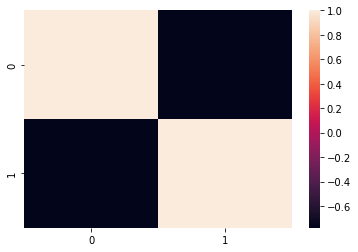

In [76]:
sns.heatmap(np.corrcoef(pd.to_numeric(auto["mpg"]), pd.to_numeric(auto["horsepower"])))


/home/esns/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mpg', ylabel='horsepower'>

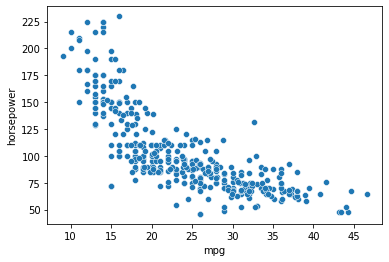

In [72]:
sns.scatterplot(pd.to_numeric(auto["mpg"]), pd.to_numeric(auto["horsepower"]))


(b) Plot the response and the predictor. Use the abline() function
to display the least squares regression line.

(c) Use the plot() function to produce diagnostic plots of the least
squares regression fit. Comment on any problems you see with
the fit.